<a href="https://colab.research.google.com/github/ThoaaPhann/AI_W11_14_04_2023/blob/main/Cifar_10_CNNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras import optimizers
from keras.models import Sequential 
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Normalization
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [13]:
from keras.utils import to_categorical
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,10)
y_train.shape

(50000, 10)

In [14]:
from keras.layers.core.activation import Activation
Model = Sequential()
Model.add(Conv2D(32,(3,3),padding ='same',input_shape =(32,32,3)))
Model.add(Activation('relu'))
Model.add(Conv2D(32,(3,3)))
Model.add(Activation('relu'))
Model.add(MaxPooling2D((2,2)))
Model.add(Dropout(0.25))

Model.add(Conv2D(64,(3,3),padding = 'same'))
Model.add(Activation('relu'))
Model.add(Conv2D(64,(3,3)))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(2,2))
Model.add(Dropout(0.25))

# ANN
Model.add(Flatten())
Model.add(Dense(512,activation = 'relu'))
Model.add(Dropout(0.25))
Model.add(Dense(10,activation = 'softmax'))
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [15]:
from keras.optimizers import SGD

sgd = SGD(lr = 0.1, decay = 1e-6, momentum = 0.9, nesterov = True)
Model.compile(loss ='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
train = Model.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose = 1)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
391/391 [==============================] - 9s 21ms/step - loss: 2.3015 - accuracy: 0.1052
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 2.3044 - accuracy: 0.0986
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 2.3044 - accuracy: 0.0994
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 2.3044 - accuracy: 0.0992
Epoch 5/20
391/391 [==============================] - 5s 12ms/step - loss: 2.3044 - accuracy: 0.0990
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 2.3042 - accuracy: 0.0974
Epoch 7/20
391/391 [==============================] - 6s 14ms/step - loss: 2.3041 - accuracy: 0.1020
Epoch 8/20
391/391 [==============================] - 5s 12ms/step - loss: 2.3043 - accuracy: 0.0992
Epoch 9/20
391/391 [==============================] - 5s 12ms/step - loss: 2.3044 - accuracy: 0.0984
Epoch 10/20
391/391 [==============================] - 5s 12ms/step - loss: 2.3043 - accura

In [16]:
Model.save('/content/drive/MyDrive/Giáo trình của 20146076/MyDrive_Picture/Cifar10.h5')

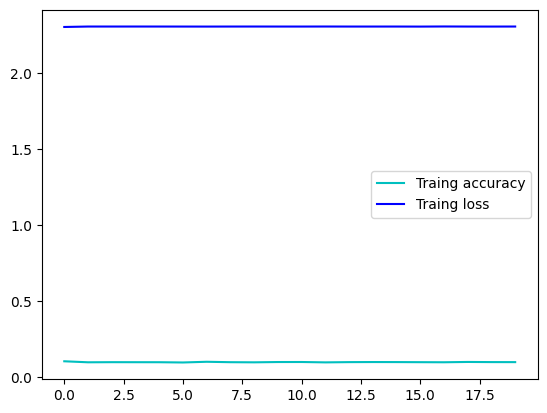

In [17]:
accuracy = train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'c',label='Traing accuracy')
plt.plot(epochs,loss,'b',label='Traing loss')
plt.legend()
plt.show()